# STA130 Course Project - Analysis 1 Project Proposal
***
#### **Author**: David Daniliuc<br>**Created**: Sat Nov. 2, 2024

*Jupyter Python Notebook for Analysis 1 testing and experimenting for the STA130 Course Project.* 

In [5]:

# Import statements
import pandas as pd
import plotly.express as px
import scipy.stats as stats

# Read and import dataset
cols = pd.read_csv("var_names.csv")
data = pd.read_csv("CSCS_data_anon.csv", na_values=["9999", "", " ", "Presented but no response", "NA"])

# Cleaning the data
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data = data[data.REMOVE_case=='No'].copy()

/var/folders/b0/20_s9xf13p33yqxth9cv22380000gn/T/ipykernel_59946/3637533835.py:8: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CSCS_data_anon.csv", na_values=["9999", "", " ", "Presented but no response", "NA"])


In [6]:
### The Correlation Between Socioeconomic Status (SES) and Mental Health During the 2021 Lockdown of the COVID-19 Pandemic

data_cross_2021 = data[data.DATASET=='2021 Cross-Sectional'].copy()

print(data_cross_2021.shape)

# Remove columns that have more missing values than missing_limit
missing_limit = 1000
keptColumns = data_cross_2021.isna().sum() < missing_limit
keptColumns = keptColumns.index[keptColumns]
data_cross_2021 = data_cross_2021[keptColumns].copy()

# Remove rows with missing values
data_cross_2021 = data_cross_2021.dropna(subset=['DEMO_household_income', 'WELLNESS_life_satisfaction'])#, 'WELLNESS_self_rated_mental_health'])

print(data_cross_2021.shape)

(3186, 1779)
(2260, 273)


In [7]:
income_mapping = {
    'Under $5,000': 0,
    '$5,000 to $9,999': 1,
    '$10,000 to $14,999': 2,
    '$15,000 to $19,999': 3,
    '$20,000 to $24,999': 4,
    '$25,000 to $29,999': 5,
    '$30,000 to $34,999': 6,
    '$35,000 to $39,999': 7,
    '$40,000 to $44,999': 8,
    '$45,000 to $49,999': 9,
    '$50,000 to $59,999': 10,
    '$60,000 to $69,999': 11,
    '$70,000 to $79,999': 12,
    '$80,000 to $89,999': 13,
    '$90,000 to $99,999': 14,
    '$100,000 to $109,999': 15,
    '$110,000 to $119,999': 16,
    '$120,000 to $129,999': 17,
    '$130,000 to $139,999': 18,
    '$140,000 to $149,999': 19,
    '$150,000 to $159,999': 20,
    '$160,000 to $169,999': 21,
    '$170,000 to $179,999': 22,
    '$180,000 to $189,999': 23,
    '$190,000 to $199,999': 24,
    '$200,000 or more': 25,
}

# Ensure 'DEMO_household_income' column is mapped to numeric values using income_mapping
data_cross_2021['DEMO_household_income_index'] = data_cross_2021['DEMO_household_income'].map(income_mapping)

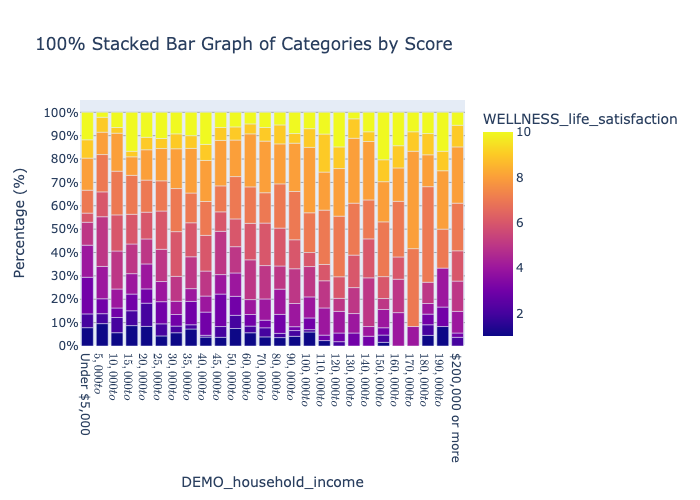

In [10]:
df_count = data_cross_2021.groupby(['DEMO_household_income', 'WELLNESS_life_satisfaction']).size().reset_index(name='Count')

# Unique sort to preserve the order of life satisfaction while also sorting the household income
for value in income_mapping.keys():
	df_count = pd.concat([df_count, df_count.loc[df_count['DEMO_household_income'] == value]], ignore_index=True)
df_count = df_count.iloc[len(df_count) // 2 :]

# Calculate the percentage directly in the DataFrame and scale it to 0-1
df_count['Percentage'] = df_count.groupby('DEMO_household_income')['Count'].transform(lambda x: x / x.sum())

# Create a stacked bar graph
fig = px.bar(df_count, x='DEMO_household_income', y='Percentage', color='WELLNESS_life_satisfaction',
             title='100% Stacked Bar Graph of Categories by Score',
             labels={'Percentage': 'Percentage (%)'},
             color_continuous_scale=px.colors.sequential.Plasma,
			)

# Update layout
fig.update_layout(
    barmode='stack',
    yaxis=dict(
        tickvals=[i / 100 for i in range(0, 101, 10)],
        ticktext=[f"{i}%" for i in range(0, 101, 10)],
        dtick=0.1,  # Add grid lines every 10%
        gridcolor='rgba(0, 0, 0, 0.3)'
    )
)

# Show the figure
fig.show(renderer='png')

In [ ]:
satisfaction_per_income = data_cross_2021.groupby('DEMO_household_income')['WELLNESS_life_satisfaction'].agg(
    Sample_Size='count',
    Mean='mean',
    Standard_Deviation='std',
    Median='median'
).reset_index()

# Add 'DEMO_household_income_index' and sort.
satisfaction_per_income.insert(1, 'DEMO_household_income_index', satisfaction_per_income['DEMO_household_income'].map(income_mapping))

satisfaction_per_income = satisfaction_per_income.sort_values('DEMO_household_income_index')

#  Perform linear regression on Mean
slope, intercept, r_value, p_value, std_err = stats.linregress(satisfaction_per_income['DEMO_household_income_index'], satisfaction_per_income['Mean'])
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, p-value: {p_value}")

# Display the sorted data
satisfaction_per_income

Slope: 0.059365268023515584, Intercept: 5.60390579592017, R-squared: 0.6847748844999932, p-value: 1.8432681811897494e-07


,DEMO_household_income,DEMO_household_income_index,Sample_Size,Mean,Standard_Deviation,Median
25,"Under $5,000",0,51,5.607843,2.864112,5.0
19,"$5,000 to $9,999",1,94,5.297872,2.331780,5.0
0,"$10,000 to $14,999",2,123,5.853659,2.331829,6.0
6,"$15,000 to $19,999",3,126,5.857143,2.779106,6.0
12,"$20,000 to $24,999",4,131,5.664122,2.750135,6.0
14,"$25,000 to $29,999",5,116,5.965517,2.480992,6.0
15,"$30,000 to $34,999",6,141,6.319149,2.346180,7.0
16,"$35,000 to $39,999",7,110,6.090909,2.528899,6.0
17,"$40,000 to $44,999",8,131,6.488550,2.412679,7.0
18,"$45,000 to $49,999",9,108,5.787037,2.422831,6.0


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(data_cross_2021['DEMO_household_income'], 
                                 data_cross_2021['WELLNESS_life_satisfaction'])

# Run the Chi-Squared Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2}, P-value = {p}")

Chi-Squared Statistic: 294.38996061405226, P-value = 0.0012829214240791744
